In [3]:
import numpy as np
#import xarray as xr # won't work for our NEMO data because longitude / lat are both dimensions and vars
import pandas as pd
from matplotlib import pyplot as plt, dates
import matplotlib.gridspec as grid_spec
from datetime import datetime, timedelta
from calendar import month_name
import netCDF4 as nc
import os

In [5]:
maskinpath = "C://Users//Greig//Documents//GitHub//NEMO-Salish-Sea-2021//data//mesh mask//"
mask_f = "mesh_mask_20210406.nc"

with nc.Dataset(maskinpath + mask_f) as ncid:
    tmask = ncid.variables["tmask"][0,0,:, :].filled()
    latt_mask = ncid.variables["nav_lat"][:, :].filled()
    lont_mask = ncid.variables["nav_lon"][:, :].filled()

print(tmask.shape)
#print(msdwswrf.shape)

(299, 132)


C:\Users\Greig\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
C:\Users\Greig\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


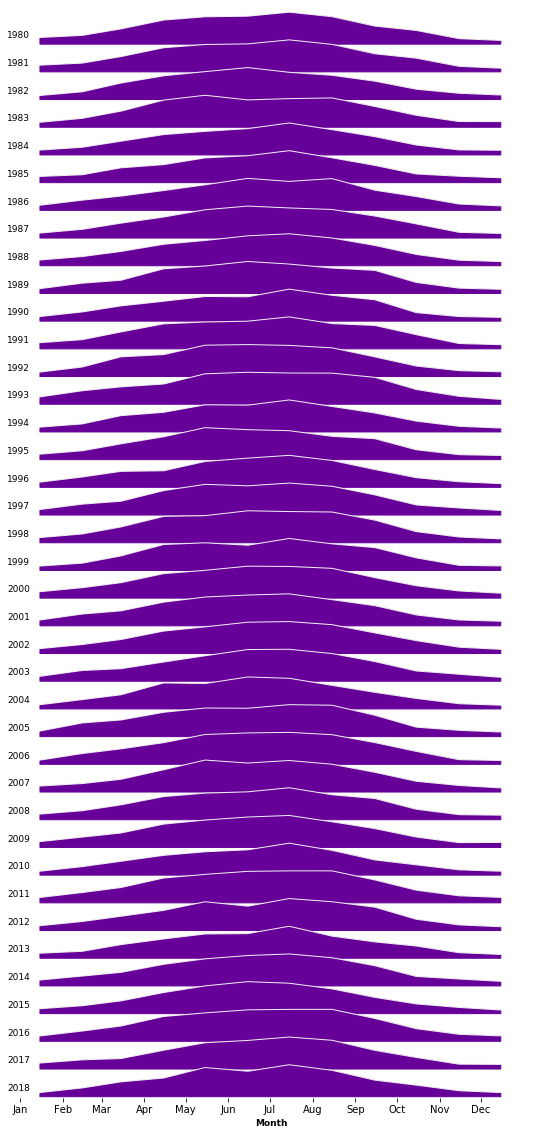

In [6]:
#inpath='/home/mid002/WORK4/SalishSea1500/ECMWF_ERA5/original/'
#outpath='/home/mid002/WORK4/SalishSea1500/ECMWF_ERA5/adjusted_md/'
inpath="C://Users//Greig//Sync//PSF//EwE//Georgia Strait 2021//LTL_model//DATA//ERA5_light_NC//"
filetemplate = "ERA5_NEMOgrid_light_monthly_{}.nc"
#outpath='C://Users//Greig//Documents//GitHub//NEMO-Salish-Sea-2021//data//forcing/ECMWF//ERA5//'
#os.makedirs(outpath,exist_ok=True)
year_start = 1980
year_end = 2019
i = 0

# rows, cols
gs = (grid_spec.GridSpec(year_end - year_start,1))
fig = plt.figure(figsize=(9,20))


#creating empty list
ax_objs = []
for year in range(year_start, year_end):
    
    f = os.path.join(inpath, filetemplate.format(year))
    
    with nc.Dataset(f) as ncid:
        # to do - can replace most of below with loop over vars
        latt = ncid.variables["latitude"][:].filled()
        lont = ncid.variables["longitude"][:].filled()
    
        msdwswrf = ncid.variables["msdwswrf"][:].filled()
        time = ncid.variables["time"][:].filled()
        time_units = ncid.variables["time"].units

        time_counter_calendar = "gregorian"
        time_py = nc.num2date(time, time_units, time_counter_calendar)
        
    ax_objs.append(fig.add_subplot(gs[i:i+1, 0:]))
    
    # trick plots - year arbitrary
    x = [datetime(2007, m.month, 15) for m in time_py]
    masked_light = [light_mo * tmask for light_mo in msdwswrf]
    y = [light_month.mean() for light_month in masked_light]
    
    ax_objs[-1].plot(x,y,color="#f0f0f0",lw=1)
    ax_objs[-1].fill_between(x, y, alpha=1,color='#660099')
    #ax_objs[-1].fill_between(x, y, alpha=1,color=colors[i]) # to do fix colors
    
    ax_objs[-1].set_xlim([datetime(2007, 1, 1), datetime(2007, 12, 31)]) # match year above
    ax_objs[-1].xaxis.set_major_locator(dates.MonthLocator())
    ax_objs[-1].xaxis.set_major_formatter(dates.DateFormatter('%b'))
    
    name_regime = str(year_start) + " to \n" + str(year_end)
   
    #ax_objs[-1].set_ylim([0, 11])
    
    # make background transparent
    rect = ax_objs[-1].patch
    rect.set_alpha(0)
    
    # remove borders, axis ticks, and labels
    ax_objs[-1].set_yticklabels([])
    ax_objs[-1].set_yticks([])
    
    if i == (year_end - year_start)-1:
        ax_objs[-1].set_xlabel("Month", fontsize=9,fontweight="bold")
    else:
        ax_objs[-1].set_xticklabels([])
        ax_objs[-1].set_xticks([])
    
    spines = ["top","right","left","bottom"]
    for s in spines:
        ax_objs[-1].spines[s].set_visible(False)

    # replaces set_ylabel
    ax_objs[-1].text(0.02,0.2,str(year),fontsize=9,ha="right",transform=ax_objs[-1].transAxes)
    #ax_objs[-1].text(0,0,name_regime,fontweight="bold",fontsize=9,ha="right",transform=ax_objs[-1].transAxes)
    #ax_objs[-1].set_ylabel(name_regime,rotation=0)
    
    i += 1

gs.update(hspace=-0.2) #adjust spacing between ridgelines
    
plt.tight_layout()
plt.show()

In [120]:
.shape

(299, 132)

In [99]:
masked_light[2].mean()

31.56047

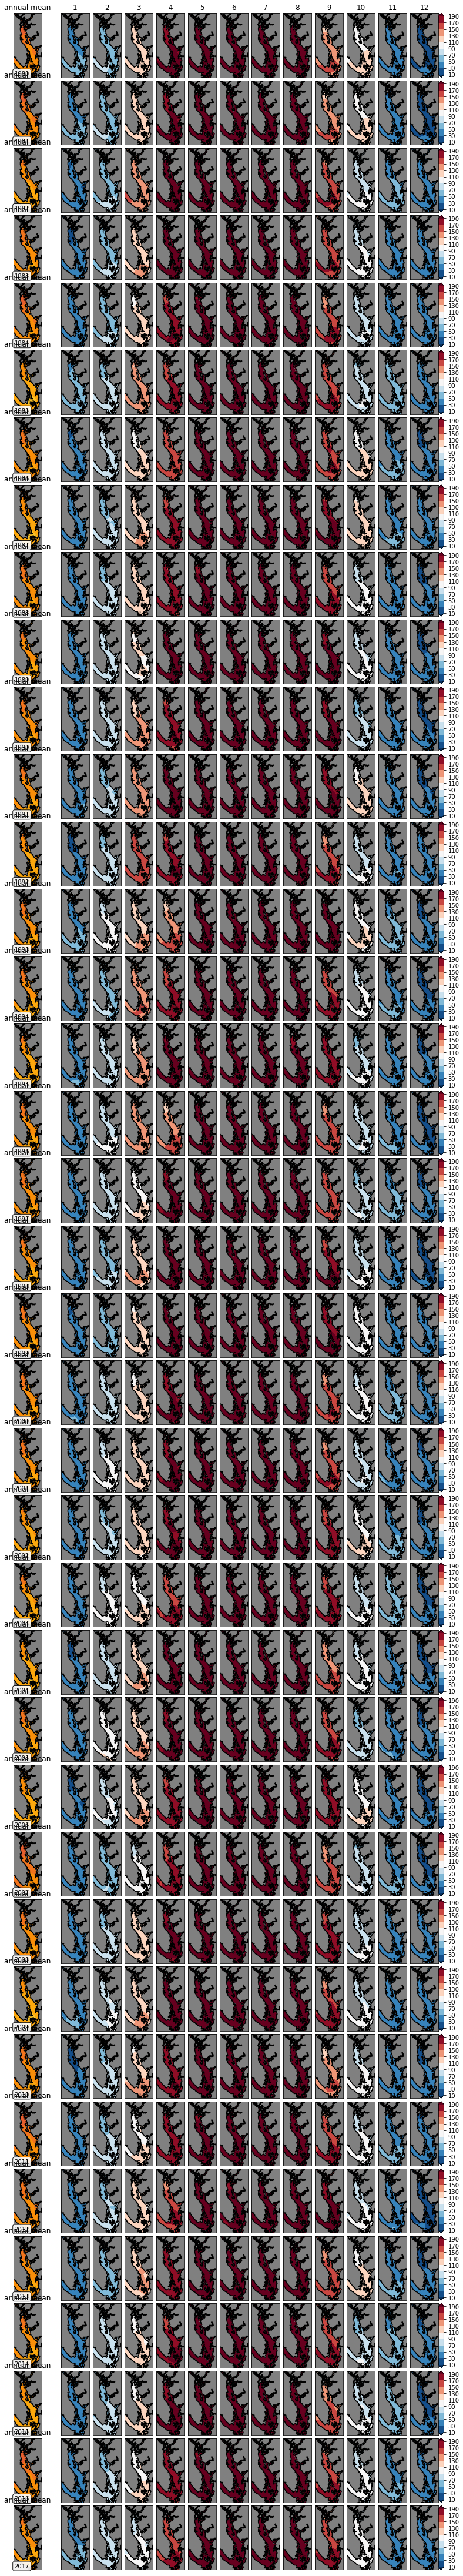

In [8]:
variables = ['msdwswrf']
years = range(1980,2018)
months = range(0,12)
#gridspec_kw = {'height_ratios': [1, 1, 1, 1], 'wspace': 0.1, 'hspace': 0.05}
gridspec_kw = {'wspace': 0.1, 'hspace': 0.05}
fig, axs = plt.subplots(len(years), 13, figsize=(12.5, 80), gridspec_kw=gridspec_kw)

#cmaps = ['inferno', 'inferno', 'inferno', 'inferno', 'inferno']
#cmaps = ['inferno', 'viridis', 'OrRd', 'BuPu', 'BuGn']
#clims = [(0, 6.1, 0.5), (0, 28, 1), (0, 21, 1), (0, 30.1, 1), (30, 80.1, 5)]
#dclims = [(-1.5, 1.6, 0.1), (-4, 4.1, 0.2), (-3, 3.1, 0.2), (-15, 15.1, 1), (-15, 15.1, 1)]
for row, year in zip(axs, years):

    var = "msdwswrf"
    f = os.path.join(inpath, filetemplate.format(year))
    
    with nc.Dataset(f) as ncid:
    
        msdwswrf = ncid.variables["msdwswrf"][:].filled()
        time = ncid.variables["time"][:].filled()
        time_units = ncid.variables["time"].units
        time_counter_calendar = "gregorian"
        time_py = nc.num2date(time, time_units, time_counter_calendar)
        
    c = row[0].contourf(msdwswrf.mean(axis=0), levels=np.arange(*(10,200,10)),cmap='inferno', extend='max')
    #c = row[0].contourf(aggregates[var]['mean'], levels=np.arange(*clim), cmap=cmap, extend='max')
    pos = row[0].get_position()
    row[0].set_position([pos.x0-0.03, pos.y0, pos.width, pos.height])
    #cax = fig.add_axes([pos.x1, pos.y0, 0.01, pos.height])
    #cax = fig.add_axes([pos.x1-0.02, pos.y0+0.01, 0.01, pos.height-0.02])
    #fig.colorbar(c, cax=cax, ticks=range(0, 101, dcbar))
    
    row[0].text(0.04, 0.03, year, transform=row[0].transAxes, bbox={'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9})
    
    row[0].set_title('annual mean', fontsize=12)
    
    for ax, month in zip(row[1:], months):

        c = ax.contourf(msdwswrf[month,:,:], levels=np.arange(*(10,200,20)), cmap='RdBu_r', extend='both')
        #c = ax.contourf(msdwswrf[0,:,:], levels=np.arange(*dclim), cmap='RdBu_r', extend='both')
        if var == 'msdwswrf': ax.set_title(month + 1, fontsize=12)
    
    for ax in row:
        if var == 'msdwswrf':
            landmask = tmask
            ax.set_xlim([10, 130])
            ax.set_ylim([60, 299])
        else:
            landmask = tmask
        ax.contourf(landmask, levels=[-0.01, 0.01], colors='gray')
        ax.contour(landmask, levels=[-0.01, 0.01], colors='k')
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        ax.set_aspect(5/4.4)
    
    pos = ax.get_position()
    #cax = fig.add_axes([pos.x1+0.01, pos.y0, 0.01, pos.height])
    cax = fig.add_axes([pos.x1, pos.y0, 0.01, pos.height])
    fig.colorbar(c, cax=cax)

In [147]:
len(years)

20

In [150]:
tmask.shape

(299, 132)

In [151]:
msdwswrf.shape

(12, 299, 132)